In [2]:
import os
import os.path as op
import pandas as pd
from sklearn.impute import SimpleImputer
import pickle

### Normal Tissues Dataset

In [3]:
normal_table = 'data/breast_normal.csv.gz'
if not op.isfile(normal_table):
    print('WARNING: file does not exist!')

df_normal = pd.read_csv(normal_table)

In [4]:
df_normal.columns = ['site'] + list(df_normal.columns)[1:]
print('loaded table of size', df_normal.shape)
df_normal.head()

loaded table of size (423669, 95)


,site,6005486025_R04C01,6005486025_R02C01,6005486025_R03C01,6005486025_R01C01,6005486011_R03C01,6005486011_R04C01,6005486011_R01C02,6005486011_R06C01,6005486011_R05C02,...,6042324006_R05C02,6057833134_R03C02,6057833134_R04C02,6057833159_R05C02,6057833166_R01C01,6057833166_R03C01,6285633051_R02C01,6057833155_R06C02,6057833101_R02C01,6057833101_R06C02
0,cg20367788,0.79,0.79,0.79,0.76,0.81,0.83,0.77,0.83,0.81,...,0.82,0.75,0.73,0.72,0.67,0.64,0.82,0.76,0.73,0.77
1,cg01847620,0.99,0.99,0.99,0.98,1.00,1.00,0.99,0.99,0.99,...,0.98,0.99,0.99,0.99,0.98,0.98,0.99,0.99,0.98,0.99
2,cg08450501,0.04,0.03,0.04,0.04,0.04,0.06,0.04,0.03,0.05,...,0.04,0.05,0.09,0.07,0.07,0.07,0.06,0.06,0.05,0.07
3,cg06848514,0.02,0.06,0.03,0.02,0.01,0.02,0.01,0.02,0.02,...,0.00,0.00,0.00,0.04,0.05,0.06,0.00,0.02,0.00,0.03
4,cg16045340,0.86,0.84,0.77,0.82,0.90,0.85,0.88,0.85,0.86,...,0.84,0.80,0.86,0.83,0.81,0.74,0.92,0.87,0.81,0.89


In [4]:
df_normal['6005486025_R04C01']

0         0.79
1         0.99
2         0.04
3         0.02
4         0.86
          ... 
423664    0.74
423665    0.57
423666    0.04
423667    0.09
423668    0.23
Name: 6005486025_R04C01, Length: 423669, dtype: float64

<AxesSubplot:>

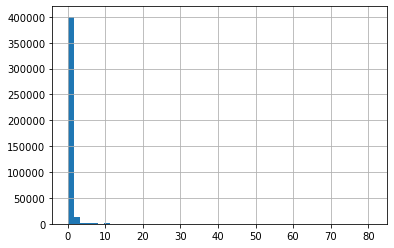

In [5]:
df_normal.isna().sum(axis=1).hist(bins=50)

<AxesSubplot:>

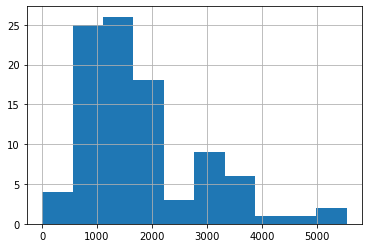

In [6]:
df_normal.isna().sum(axis=0).hist(bins=10)

In [7]:
df_normal.isna().sum().sum()

167684

#### Binarize the classifier by adding a column 'is_cancer': 0 for normal tissue, 1 for cancer

In [8]:
#transpose the table as preprocessing for binarization:
df_normal = df_normal.set_index('site')
df_normal = df_normal.transpose()

In [9]:
df_normal['is_cancer'] = 0
df_normal.head(2)

site,cg20367788,cg01847620,cg08450501,cg06848514,cg16045340,cg08036346,cg26702958,cg26361646,cg21774865,cg12465710,...,cg15545692,cg08989942,cg18293633,cg24076348,cg17754680,cg09460231,cg22502319,cg02078370,cg18105767,is_cancer
6005486025_R04C01,0.79,0.99,0.04,0.02,0.86,0.98,0.12,0.0,0.96,0.23,...,0.77,0.78,0.50,0.81,0.74,0.57,0.04,0.09,0.23,0
6005486025_R02C01,0.79,0.99,0.03,0.06,0.84,0.98,0.06,0.0,0.98,0.17,...,0.82,0.82,0.57,0.78,0.77,0.49,0.04,0.06,0.32,0


### Cancer Dataset

In [5]:
cancer_table = 'data/breast_cancer.csv.gz'
if not op.isfile(cancer_table):
    print('WARNING: file does not exist!')

df_cancer = pd.read_csv(cancer_table)

In [6]:
df_cancer.columns = ['site'] + list(df_cancer.columns)[1:]
print('loaded table of size', df_cancer.shape)
df_cancer.head()

loaded table of size (423669, 641)


,site,6005486021_R01C01,6005486021_R02C01,6005486021_R03C01,6005486021_R04C01,6005486021_R05C01,6005486021_R01C02,6005486021_R02C02,6005486021_R03C02,6005486021_R05C02,...,6285633072_R06C01,6285633072_R01C02,6285633072_R04C02,6285633072_R03C02,6285633072_R05C02,7786923102_R06C02,7796806109_R01C01,7796806109_R05C01,7796806109_R06C01,7796806109_R02C01
0,cg20367788,0.70,0.74,0.80,0.78,0.76,0.72,0.75,0.75,0.77,...,0.81,0.74,0.75,0.79,0.78,0.76,0.73,0.76,0.70,0.68
1,cg01847620,0.99,0.99,0.99,0.99,1.00,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.98,0.99,0.99,0.99,0.99,0.98,0.99
2,cg08450501,0.04,0.05,0.05,0.04,0.05,0.04,0.05,0.04,0.03,...,0.04,0.05,0.06,0.06,0.05,0.07,0.09,0.06,0.07,0.08
3,cg06848514,0.04,0.01,0.02,0.02,0.00,0.04,0.01,0.04,0.03,...,0.04,0.02,0.04,0.03,0.04,0.03,0.02,0.02,0.05,0.02
4,cg16045340,0.65,0.73,0.82,0.88,0.64,0.76,0.80,0.71,0.82,...,0.90,0.86,0.89,0.88,0.88,0.85,0.82,0.86,0.73,0.81


<AxesSubplot:>

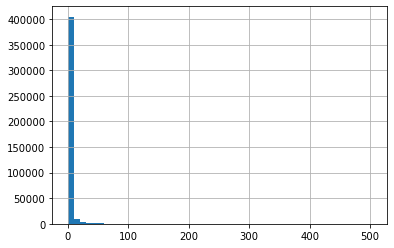

In [12]:
df_cancer.isna().sum(axis=1).hist(bins=50)

<AxesSubplot:>

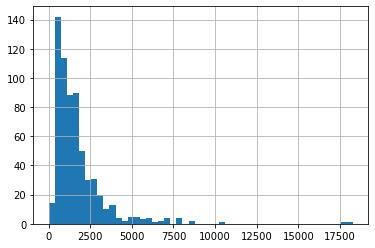

In [13]:
df_cancer.isna().sum(axis=0).hist(bins=50)

In [14]:
df_cancer.isna().sum().sum()

1108417

#### Binarize the classifier by adding a column 'is_cancer': 0 for normal tissue, 1 for cancer

In [15]:
#transpose the table as preprocessing for binarization:
df_cancer = df_cancer.set_index('site')
df_cancer = df_cancer.transpose()

In [16]:
df_cancer['is_cancer'] = 1
df_cancer['is_cancer'].unique()

array([1], dtype=int64)

### Merge the Datasets (cancer, normal) into one:

In [17]:
all_samples = pd.concat([df_cancer, df_normal])
all_samples.head()

site,cg20367788,cg01847620,cg08450501,cg06848514,cg16045340,cg08036346,cg26702958,cg26361646,cg21774865,cg12465710,...,cg15545692,cg08989942,cg18293633,cg24076348,cg17754680,cg09460231,cg22502319,cg02078370,cg18105767,is_cancer
6005486021_R01C01,0.70,0.99,0.04,0.04,0.65,0.99,0.10,0.00,0.85,0.46,...,0.82,0.51,0.83,0.52,0.70,0.25,0.04,0.06,0.03,1
6005486021_R02C01,0.74,0.99,0.05,0.01,0.73,0.99,0.52,0.01,0.98,0.80,...,0.83,0.78,0.83,0.83,0.80,0.51,0.03,0.05,0.16,1
6005486021_R03C01,0.80,0.99,0.05,0.02,0.82,0.99,0.49,0.00,0.98,0.62,...,0.82,0.75,0.77,0.52,0.78,0.36,0.04,0.05,0.32,1
6005486021_R04C01,0.78,0.99,0.04,0.02,0.88,0.99,0.46,0.00,0.99,0.66,...,0.88,0.87,0.85,0.56,0.84,0.78,0.04,0.06,0.28,1
6005486021_R05C01,0.76,1.00,0.05,0.00,0.64,0.99,0.67,0.11,0.98,0.68,...,0.86,0.67,0.81,0.86,0.85,0.57,0.04,0.05,0.38,1


In [18]:
all_samples.shape

(734, 423670)

In [19]:
all_samples['is_cancer'].value_counts() # In the merged df there are 640 samples from tumors and 94 samples from healthy tissues.

1    640
0     94
Name: is_cancer, dtype: int64

<AxesSubplot:>

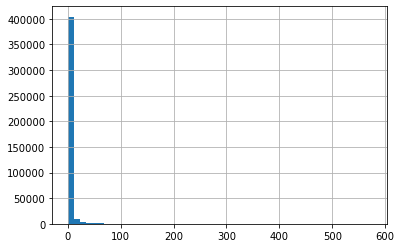

In [20]:
all_samples.isna().sum(axis=0).hist(bins=50)

<AxesSubplot:>

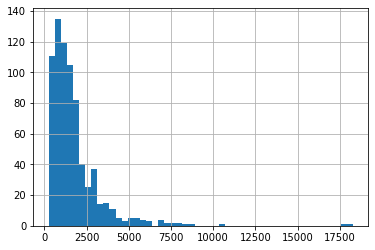

In [21]:
all_samples.isna().sum(axis=1).hist(bins=50)

In [22]:
all_samples.isna().sum().sum()

1276101

#### Drop Nulls

In [23]:
all_samples.dropna(axis=1, inplace=True)

In [24]:
all_samples.isna().sum().sum()

0

In [25]:
all_samples.shape

(734, 233656)

### Pickle the merged, nulls-free DF

In [27]:
with open('all_samples.pkl', 'wb') as f:
    pickle.dump(all_samples, f)